# QM final assessment code

## import relevant packages

In [1]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt

## Get the data

In [2]:
url = 'https://raw.githubusercontent.com/LingruFeng/QM_coursework3/main/data/gender_fulltime_weekly.csv'
df = pd.read_csv(url, low_memory=False)
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")
# Look at the first few rows:
df.head()

Data frame is 33 x 20


,female_ft_2010,male_ft_2010,female_ft_2011,male_ft_2011,female_ft_2012,male_ft_2012,female_ft_2013,male_ft_2013,female_ft_2014,male_ft_2014,female_ft_2015,male_ft_2015,female_ft_2016,male_ft_2016,female_ft_2017,male_ft_2017,female_ft_2018,male_ft_2018,female_ft_2019,male_ft_2019
0,718.0,1112.0,738.8,1144.2,751.8,1041.2,747.4,1064.9,749.4,1082.3,766.6,1054.2,796.8,1108.3,799.6,1149.9,838.3,1218.4,841.5,1197.8
1,440.1,573.9,443.0,609.6,505.3,699.7,596.4,689.8,569.1,655.6,471.9,681.0,451.7,672.0,493.2,656.1,517.2,621.2,453.4,641.0
2,490.3,651.7,538.5,615.6,503.2,642.8,512.8,632.9,498.9,675.1,524.0,655.9,508.5,640.6,542.2,657.7,542.1,624.7,570.7,653.1
3,466.7,571.7,455.2,554.0,478.8,582.2,489.0,552.6,471.4,602.1,433.2,613.2,488.0,613.0,554.2,599.6,528.2,635.2,558.4,644.8
4,497.6,523.6,484.7,527.5,494.5,556.3,533.1,555.4,533.0,599.8,527.7,622.5,527.9,605.0,468.7,628.1,481.7,650.4,622.2,694.8


## Creat the gender pay gap data frame

In [3]:
data=pd.DataFrame()
data["gap_2010"]=(df.male_ft_2010-df.female_ft_2010)/df.male_ft_2010
data["gap_2011"]=(df.male_ft_2011-df.female_ft_2011)/df.male_ft_2011
data["gap_2012"]=(df.male_ft_2012-df.female_ft_2012)/df.male_ft_2012
data["gap_2013"]=(df.male_ft_2013-df.female_ft_2013)/df.male_ft_2013
data["gap_2014"]=(df.male_ft_2014-df.female_ft_2014)/df.male_ft_2014
data["gap_2015"]=(df.male_ft_2015-df.female_ft_2015)/df.male_ft_2015
data["gap_2016"]=(df.male_ft_2016-df.female_ft_2016)/df.male_ft_2016
data["gap_2017"]=(df.male_ft_2017-df.female_ft_2017)/df.male_ft_2017
data["gap_2018"]=(df.male_ft_2018-df.female_ft_2018)/df.male_ft_2018
data["gap_2019"]=(df.male_ft_2019-df.female_ft_2019)/df.male_ft_2019

In [4]:
data.head()

,gap_2010,gap_2011,gap_2012,gap_2013,gap_2014,gap_2015,gap_2016,gap_2017,gap_2018,gap_2019
0,0.354317,0.354309,0.277949,0.298150,0.307586,0.272814,0.281061,0.304635,0.311967,0.297462
1,0.233142,0.273294,0.277833,0.135402,0.131940,0.307048,0.327827,0.248285,0.167418,0.292668
2,0.247660,0.125244,0.217175,0.189761,0.260998,0.201098,0.206213,0.175612,0.132223,0.126168
3,0.183663,0.178339,0.177602,0.115092,0.217074,0.293542,0.203915,0.075717,0.168451,0.133995
4,0.049656,0.081137,0.111091,0.040151,0.111370,0.152289,0.127438,0.253781,0.259379,0.104491


Print some summary information:

In [174]:
m=data.describe()
m

,gap_2010,gap_2011,gap_2012,gap_2013,gap_2014,gap_2015,gap_2016,gap_2017,gap_2018,gap_2019
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.156957,0.154761,0.139385,0.139396,0.143283,0.159372,0.161641,0.173488,0.166534,0.152062
std,0.071325,0.083624,0.069391,0.082093,0.071612,0.069021,0.073423,0.078341,0.075946,0.067084
min,-0.015608,-0.017989,-0.010072,-0.049114,-0.002186,0.050726,0.030174,-0.030276,0.000356,0.029443
25%,0.118381,0.096826,0.082129,0.100087,0.099216,0.113771,0.109968,0.120599,0.117289,0.116574
50%,0.148722,0.160132,0.146617,0.147926,0.144153,0.144077,0.169700,0.177360,0.165923,0.149494
75%,0.193726,0.211815,0.191388,0.189761,0.181491,0.193060,0.206213,0.202534,0.209361,0.189346
max,0.354317,0.354309,0.277949,0.298150,0.307586,0.307048,0.327827,0.375515,0.323521,0.297462


In [175]:
m.columns = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
m = pd.DataFrame(m.values.T, index=m.columns, columns=m.index)
m = m[['mean','min','max','std']]
m['mean']=round(m[['mean']]*100,2)
m['min']=round(m[['min']]*100,2)
m['max']=round(m[['max']]*100,2)
m['std']=round(m[['std']],3)
m

,mean,min,max,std
2010,15.70,-1.56,35.43,0.071
2011,15.48,-1.80,35.43,0.084
2012,13.94,-1.01,27.79,0.069
2013,13.94,-4.91,29.82,0.082
2014,14.33,-0.22,30.76,0.072
2015,15.94,5.07,30.70,0.069
2016,16.16,3.02,32.78,0.073
2017,17.35,-3.03,37.55,0.078
2018,16.65,0.04,32.35,0.076
2019,15.21,2.94,29.75,0.067


## Line chart of the gender pay gap in 10 years

In [177]:
n = m[['mean']]
n.columns =['mean (%)']
n

,mean (%)
2010,15.70
2011,15.48
2012,13.94
2013,13.94
2014,14.33
2015,15.94
2016,16.16
2017,17.35
2018,16.65
2019,15.21


In [110]:
x = np.array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
y = np.array([15.70 , 15.48, 13.94, 13.94, 14.33, 15.94, 16.16, 17.35, 16.65,15.21])

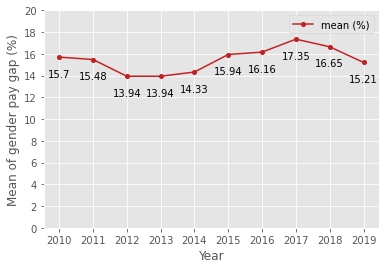

In [149]:
my_y_ticks = np.arange(0, 21, 2)
my_x_ticks = np.arange(2010, 2020,1)
plt.style.use('ggplot')
n.plot(color = '#C42022',marker = 'o',markersize = 4)
plt.yticks(my_y_ticks)
plt.xticks(my_x_ticks)
plt.xlabel('Year')
plt.ylabel('Mean of gender pay gap (%)')
for a,b in zip(x,y):
    plt.text(a,b-2,b,ha='center',va="bottom",fontsize=10)
plt.legend()
plt.savefig('line_chart')
plt.show()

## Gender pay gap difference density histogram

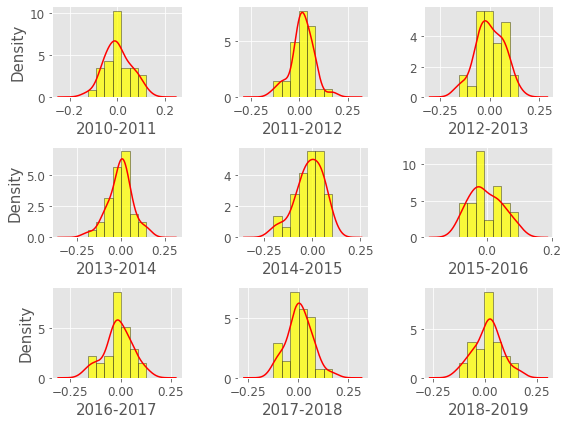

In [151]:
plt.figure(figsize=(8,6)) 
ax1 = plt.subplot(3,3,1)
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)
ax4 = plt.subplot(3,3,4)
ax5 = plt.subplot(3,3,5)
ax6 = plt.subplot(3,3,6)
ax7 = plt.subplot(3,3,7)
ax8 = plt.subplot(3,3,8)
ax9 = plt.subplot(3,3,9)

plt.sca(ax1)
plt.ylabel('Density',fontsize=15)
plt.xlabel('2010-2011',fontsize=15)
(data['gap_2010']-data['gap_2011']).plot(kind = 'hist', bins = 7, color = 'yellow', edgecolor = 'black', density = True, alpha=0.75)
(data['gap_2010']-data['gap_2011']).plot(kind = 'kde', color = 'red')
plt.tick_params(labelsize=12)
plt.sca(ax2)
plt.xlabel('2011-2012',fontsize=15)
(data['gap_2011']-data['gap_2012']).plot(kind = 'hist', bins = 7, color = 'yellow', edgecolor = 'black', density = True, alpha=0.75)
(data['gap_2011']-data['gap_2012']).plot(kind = 'kde', color = 'red')
plt.ylabel(' ')
plt.tick_params(labelsize=12)
plt.sca(ax3)
plt.xlabel('2012-2013',fontsize=15)
(data['gap_2012']-data['gap_2013']).plot(kind = 'hist', bins = 7, color = 'yellow', edgecolor = 'black', density = True, alpha=0.75)
(data['gap_2012']-data['gap_2013']).plot(kind = 'kde', color = 'red')
plt.ylabel(' ')
plt.tick_params(labelsize=12)
plt.sca(ax4)
plt.xlabel('2013-2014',fontsize=15)
plt.ylabel('Density',fontsize=15)
(data['gap_2013']-data['gap_2014']).plot(kind = 'hist', bins = 7, color = 'yellow', edgecolor = 'black', density = True, alpha=0.75)
(data['gap_2013']-data['gap_2014']).plot(kind = 'kde', color = 'red')
plt.tick_params(labelsize=12)
plt.sca(ax5)
plt.xlabel('2014-2015',fontsize=15)
(data['gap_2014']-data['gap_2015']).plot(kind = 'hist', bins = 7, color = 'yellow', edgecolor = 'black', density = True, alpha=0.75)
(data['gap_2014']-data['gap_2015']).plot(kind = 'kde', color = 'red')
plt.ylabel(' ')
plt.tick_params(labelsize=12)
plt.sca(ax6)
plt.xlabel('2015-2016',fontsize=15)
(data['gap_2015']-data['gap_2016']).plot(kind = 'hist', bins = 7, color = 'yellow', edgecolor = 'black', density = True, alpha=0.75)
(data['gap_2015']-data['gap_2016']).plot(kind = 'kde', color = 'red')
plt.ylabel(' ')
plt.tick_params(labelsize=12)
plt.sca(ax7)
plt.xlabel('2016-2017',fontsize=15)
plt.ylabel('Density',fontsize=15)
(data['gap_2016']-data['gap_2017']).plot(kind = 'hist', bins = 7, color = 'yellow', edgecolor = 'black', density = True, alpha=0.75)
(data['gap_2016']-data['gap_2017']).plot(kind = 'kde', color = 'red')
plt.tick_params(labelsize=12)
plt.sca(ax8)
plt.xlabel('2017-2018',fontsize=15)
(data['gap_2017']-data['gap_2018']).plot(kind = 'hist', bins = 7, color = 'yellow', edgecolor = 'black', density = True, alpha=0.75)
(data['gap_2017']-data['gap_2018']).plot(kind = 'kde', color = 'red')
plt.ylabel(' ')
plt.tick_params(labelsize=12)
plt.sca(ax9)
plt.xlabel('2018-2019',fontsize=15)
(data['gap_2018']-data['gap_2019']).plot(kind = 'hist', bins = 7, color = 'yellow', edgecolor = 'black', density = True, alpha=0.75)
(data['gap_2018']-data['gap_2019']).plot(kind = 'kde', color = 'red')
plt.ylabel(' ')
plt.tick_params(labelsize=12)

plt.tight_layout()
plt.savefig('sample_density')

## Paired t-test

Set the significance threshold value

In [134]:
alpha = 0.05

***2010-2011***

In [135]:
test_stat, p_value = sps.ttest_rel(data.gap_2010, data.gap_2011)
print("p-value =", p_value)
print("statsictic =", test_stat)
# Reach a conclusion:
if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

p-value = 0.8228566099106412
statsictic = 0.22571747221326982
p-value >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from populations with the same mean.


***2011-2012***

In [136]:
test_stat, p_value = sps.ttest_rel(data.gap_2011, data.gap_2012)
print("p-value =", p_value)
print("statsictic =", test_stat)
# Reach a conclusion:
if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

p-value = 0.13725378061951643
statsictic = 1.524312483067002
p-value >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from populations with the same mean.


***2012-2013***

In [137]:
test_stat, p_value = sps.ttest_rel(data.gap_2012, data.gap_2013)
print("p-value =", p_value)
print("statsictic =", test_stat)
# Reach a conclusion:
if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

p-value = 0.9992645284724497
statsictic = -0.0009290054065054297
p-value >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from populations with the same mean.


***2013-2014***

In [138]:
test_stat, p_value = sps.ttest_rel(data.gap_2013, data.gap_2014)
print("p-value =", p_value)
print("statsictic =", test_stat)
# Reach a conclusion:
if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

p-value = 0.7511025812753208
statsictic = -0.31992787971143394
p-value >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from populations with the same mean.


***2014-2015***

In [139]:
test_stat, p_value = sps.ttest_rel(data.gap_2014, data.gap_2015)
print("p-value =", p_value)
print("statsictic =", test_stat)
# Reach a conclusion:
if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

p-value = 0.21944006710402575
statsictic = -1.2525673763555718
p-value >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from populations with the same mean.


***2015-2016***

In [140]:
test_stat, p_value = sps.ttest_rel(data.gap_2015, data.gap_2016)
print("p-value =", p_value)
print("statsictic =", test_stat)
# Reach a conclusion:
if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

p-value = 0.7941760362924293
statsictic = -0.2630792584648542
p-value >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from populations with the same mean.


***2016-2017***

In [141]:
test_stat, p_value = sps.ttest_rel(data.gap_2016, data.gap_2017)
print("p-value =", p_value)
print("statsictic =", test_stat)
# Reach a conclusion:
if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

p-value = 0.3379068626212943
statsictic = -0.9728865717870816
p-value >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from populations with the same mean.


***2017-2018***

In [142]:
test_stat, p_value = sps.ttest_rel(data.gap_2017, data.gap_2018)
print("p-value =", p_value)
print("statsictic =", test_stat)
# Reach a conclusion:
if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

p-value = 0.5333170892829162
statsictic = 0.6297687430919618
p-value >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from populations with the same mean.


***2018-2019***

In [146]:
test_stat, p_value = sps.ttest_rel(data.gap_2018, data.gap_2019)
print("p-value =", p_value)
print("statsictic =", test_stat)
# Reach a conclusion:
if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

p-value = 0.22441834627975837
statsictic = 1.238831420333568
p-value >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from populations with the same mean.


In [179]:
?sps.ttest_rel

Signature: sps.ttest_rel(a, b, axis=0, nan_policy='propagate')
Docstring:
Calculate the t-test on TWO RELATED samples of scores, a and b.

This is a two-sided test for the null hypothesis that 2 related or
repeated samples have identical average (expected) values.

Parameters
----------
a, b : array_like
    The arrays must have the same shape.
axis : int or None, optional
    Axis along which to compute test. If None, compute over the whole
    arrays, `a`, and `b`.
nan_policy : {'propagate', 'raise', 'omit'}, optional
    Defines how to handle when input contains nan.
    The following options are available (default is 'propagate'):

      * 'propagate': returns nan
      * 'raise': throws an error
      * 'omit': performs the calculations ignoring nan values

Returns
-------
statistic : float or array
    t-statistic.
pvalue : float or array
    Two-sided p-value.

Notes
-----
Examples for use are scores of the same set of student in
different exams, or repeated sampling from the sa